# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/8_pytorch_rfbnet/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh
     
     - ./install.sh

# About the network

1. Paper on RBFNet: https://arxiv.org/abs/1711.07767

2. Blog 1 on Receptive field: http://blog.christianperone.com/2017/11/the-effective-receptive-field-on-cnns/

3. Blog 2 on Receptive field: http://www.cs.toronto.edu/~wenjie/papers/nips16/top.pdf

# COCO

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |----images (set_dir)
          |                |
          |                |---------img1.jpg
          |                |---------img2.jpg
          |                |---------..........(and so on) 
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - set_dir = "Images";
 

Note: Annotation file name too coincides against the set_dir

# Sample Dataset Credits

    credits: https://github.com/experiencor/kangaroo

In [1]:
import os
import sys
sys.path.append("../../8_pytorch_rfbnet/lib/");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
#USing training set structured in format 1
root_dir = "../sample_dataset";
coco_dir = "kangaroo";
set_dir = "Images";

In [5]:
#300
#512
gtf.Train_Dataset(root_dir, coco_dir, set_dir, batch_size=4,image_size=512, num_workers=3)

In [7]:
#vgg - 300, 512
#e_vgg - 300, 512
#mobilenet - 300, 512
gtf.Model(model_name="e_vgg", use_gpu=True, ngpu=1);

In [8]:
gtf.Set_HyperParams(lr=0.0001, momentum=0.9, weight_decay=0.0005, gamma=0.1, jaccard_threshold=0.5)

In [9]:
gtf.Train(epochs=10, log_iters=True, output_weights_dir="weights", saved_epoch_interval=10);

Loading base network...
Initializing weights...
Loading Dataset...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
../sample_dataset_kangaroo_Images gt roidb loaded from /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.10_rfbnet/example_notebooks/8_pytorch_rfbnet/coco_cache/../sample_dataset_kangaroo_Images_gt_roidb.pkl
Training RFB_E_vgg on COCO


/home/abhi/.virtualenvs/monk_obj_8_pytorch_rfbnet/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/abhi/.virtualenvs/monk_obj_8_pytorch_rfbnet/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch:1 || epochiter: 0/41|| Current iter 0|| Total iter 410 || L: 3.6446 C: 10.2300||Batch time: 10.2085 sec. ||LR: 0.00000100
Epoch:1 || epochiter: 10/41|| Current iter 10|| Total iter 410 || L: 3.5072 C: 7.8919||Batch time: 0.4414 sec. ||LR: 0.00000583
Epoch:1 || epochiter: 20/41|| Current iter 20|| Total iter 410 || L: 3.1454 C: 6.9786||Batch time: 0.4435 sec. ||LR: 0.00001066
Epoch:1 || epochiter: 30/41|| Current iter 30|| Total iter 410 || L: 3.1090 C: 5.3008||Batch time: 0.4442 sec. ||LR: 0.00001549
Epoch:1 || epochiter: 40/41|| Current iter 40|| Total iter 410 || L: 3.0203 C: 4.8700||Batch time: 0.4426 sec. ||LR: 0.00002032
Epoch:2 || epochiter: 9/41|| Current iter 50|| Total iter 410 || L: 2.8682 C: 4.6234||Batch time: 0.4540 sec. ||LR: 0.00002515
Epoch:2 || epochiter: 19/41|| Current iter 60|| Total iter 410 || L: 2.8086 C: 4.1731||Batch time: 0.4625 sec. ||LR: 0.00002998
Epoch:2 || epochiter: 29/41|| Current iter 70|| Total iter 410 || L: 3.0006 C: 4.2408||Batch time: 0.4518

# Inference 

In [1]:
import os
import sys
sys.path.append("../../8_pytorch_rfbnet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_name="e_vgg", weights="weights/Final_RFB_E_vgg_COCO.pth", use_gpu=True)

In [5]:
class_file = "../sample_dataset/kangaroo/annotations/classes.txt"
gtf.Image_Params(class_file, input_size=512)

In [6]:
gtf.Setup();

Finished loading model!


/home/abhi/.virtualenvs/monk_obj_8_pytorch_rfbnet/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


1 1


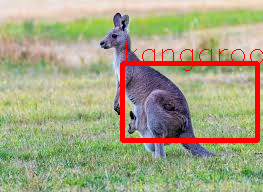

In [7]:
img_path = "../sample_dataset/kangaroo/test/kg1.jpeg";
output = gtf.Predict(img_path, thresh=0.6, font_size=1, line_size=3)
from IPython.display import Image
Image(filename='output.png') 

2 1


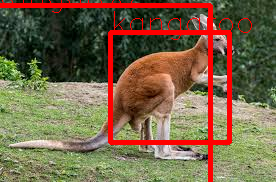

In [10]:
img_path = "../sample_dataset/kangaroo/test/kg3.jpeg";
output = gtf.Predict(img_path, thresh=0.5, font_size=1, line_size=3)
from IPython.display import Image
Image(filename='output.png')